STEP A1
Import packages

## PART A --- Data Cleaning

In [876]:
import os                 # Operation system related commands

## Data manipulation
import os #----to save files on operating system
import numpy as np
import pandas as pd
import datetime as dt
import pandas_profiling  #conda install -c anaconda pandas-profiling
import re as re

## Visualization
import scipy.stats as stats
import matplotlib.pyplot as plt
%pylab inline  
import seaborn as sns
# To show visulization output in Jupyter notebooks

# Before model building
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import sklearn.preprocessing as preprocess
import sklearn.feature_selection as feature_selection

#Model Building
import statsmodels as st
import statsmodels.formula.api as smp
from sklearn.linear_model import LinearRegression
#Selectively import to ensure that the hige package does not load your system


Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['test', 'datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [877]:
%pwd

'C:\\Users\\rujut\\Pictures\\Python\\Assignment\\Answers_rujuta0101@gmail.com__PythonAdvanced'

In [878]:

car=pd.read_csv("C:/Users/rujut/Pictures/Python/Assignment/Advanced_Python/1. Case Study - Automobile Example - Class Exercise/Car_sales.csv")
car.head()

,Manufacturer,Model,Sales_in_thousands,four_year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [879]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
Manufacturer              157 non-null object
Model                     157 non-null object
Sales_in_thousands        157 non-null float64
four_year_resale_value    121 non-null float64
Vehicle_type              157 non-null object
Price_in_thousands        155 non-null float64
Engine_size               156 non-null float64
Horsepower                156 non-null float64
Wheelbase                 156 non-null float64
Width                     156 non-null float64
Length                    156 non-null float64
Curb_weight               155 non-null float64
Fuel_capacity             156 non-null float64
Fuel_efficiency           154 non-null float64
Latest_Launch             157 non-null object
Power_perf_factor         155 non-null float64
dtypes: float64(12), object(4)
memory usage: 19.8+ KB


In [880]:
car.columns
# No dot in column name

Index(['Manufacturer', 'Model', 'Sales_in_thousands', 'four_year_resale_value',
       'Vehicle_type', 'Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Latest_Launch', 'Power_perf_factor'],
      dtype='object')

In [881]:
profile_report=pandas_profiling.ProfileReport(car)
profile_report.to_file('car_profile_report.html')
profile_report
#NOt available in anaconda package
# Anaconda prompt:: conda install -c anaconda pandas-profiling


#High cardinality => mostly numeric converted into categorical

# Need to look into Model and Latest Launch 
# Remove either Power_perf_factor or Horsepower; Depedning on Y predicablilty


C:\ProgramData\Anaconda3\lib\site-packages\pandas_profiling\describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,16
Number of observations,157
Total Missing (%),1.9%
Total size in memory,19.8 KiB
Average record size in memory,128.8 B
Numeric,10
Categorical,4
Boolean,0
Date,0
Text (Unique),0
Rejected,2


In [882]:
#column names:::::::::

#Change data type:::
# categorical to numeric::::::::::::::
# categorical to date:::::::::::::::::
#      Latest_Launch
# numeric to categorical::::::::::::::::


#missing value::::::::
#    four_year_resale_value (also corelated)
#    Engine_size--1
#    Horsepower---1 (also corelated)
#    Wheelbase--1
#    Width------1
#    Length-----1
#    Curb_weight----2
#    Fuel_capacity--1
#    Fuel_efficiency--3

#Cardinal categorical to dummies::::::
#     Manufacturer--30
#     Model---------156?
#     Vehicle_type--2


#outliers ::::::::::::::::::::::::::::
#         Sales_in_thousands , all varaibles


#Drop variables with low variation/ Coefficent of variation <0.05 ||| Can observe graph to zero variance :::::::::::::::
#Width <-> 0.048515

# Drop variables which makes no sense in model eg LoanId, Employee Id:::::::::

#drop variable for correlation::::
# Price_in_thousands<-> four_year_resale_value
# Power_perf_factor<-> HorsePower





In [883]:
#column Renaming
#Replace dot with underscore
car.columns=[i.replace(".","_") for i in car.columns]
car.columns=[i.replace("-","_") for i in car.columns]
car.columns

Index(['Manufacturer', 'Model', 'Sales_in_thousands', 'four_year_resale_value',
       'Vehicle_type', 'Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Latest_Launch', 'Power_perf_factor'],
      dtype='object')

In [884]:
### Replace an element in value with another value eg replace % with nothing
car['Fuel_efficiency']=car['Fuel_efficiency'].apply(lambda x: float(str(x).replace('%','')))

In [885]:
# Missing Value Treatment
# Typically For catgeorical-- Mode; Numeric---Median

In [886]:
#Change data type:::
# categorical to numeric::::::::::::::
# categorical to date:::::::::::::::::
#      Latest_Launch
# numeric to categorical::::::::::::::::

car.dtypes 
car['Latest_Launch']=pd.to_datetime(pd.Series(car['Latest_Launch']))
from datetime import datetime
car["No_of_Days"]=(datetime.today()-car['Latest_Launch'])/np.timedelta64(1,'D')
car.head(10)

#Remove percentage and convert string to float
#loan['Latest_Launch']=loan['Latest_Launch'].apply(lambda x: float(str(x).replace("%","")))

#loan[['fico_low','fico_high']] = loan['fico'].str.split('-',expand=True)
#loan['fico_avg']=loan.fico_low.astype('float') + loan.fico_low.astype('float')/2



,Manufacturer,Model,Sales_in_thousands,four_year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,No_of_Days
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2012-02-02,58.280150,3077.460071
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,2011-06-03,91.370778,3321.460071
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,2012-01-04,NaN,3106.460071
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2011-03-10,91.389779,3406.460071
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,2011-10-08,62.777639,3194.460071
5,Audi,A6,18.780,23.555,Passenger,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2011-08-09,84.565105,3254.460071
6,Audi,A8,1.380,39.000,Passenger,62.00,4.2,310.0,113.0,74.0,198.2,3.902,23.7,21.0,2012-02-27,134.656858,3052.460071
7,BMW,323i,19.747,NaN,Passenger,26.99,2.5,170.0,107.3,68.4,176.0,3.179,16.6,26.0,2011-06-28,71.191207,3296.460071
8,BMW,328i,9.231,28.675,Passenger,33.40,2.8,193.0,107.3,68.5,176.0,3.197,16.6,24.0,2012-01-29,81.877069,3081.460071
9,BMW,528i,17.527,36.125,Passenger,38.90,2.8,193.0,111.4,70.9,188.0,3.472,18.5,25.0,2011-04-04,83.998724,3381.460071


In [887]:
from datetime import datetime as dt
from datetime import date as dtd
from datetime import time as dtt

def date_into_meaningful(x):
    y1=x.year
    y2=pd.datetime.now().year
    y=y2-y1
    z=x.month
    return (y)

car_final=pd.DataFrame()

car_final['year']=car['Latest_Launch'].apply(date_into_meaningful)
car_final['month']=car['Latest_Launch'].apply(lambda x: x.month)


In [888]:
# Drop not required variables--- Will include unique identifiers, highly collierated 

car.drop(['Model','four_year_resale_value','Power_perf_factor'],axis=1,inplace=True) #Axis=1 for dropping columns
car.drop(['Latest_Launch'],axis=1,inplace=True)
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
Manufacturer          157 non-null object
Sales_in_thousands    157 non-null float64
Vehicle_type          157 non-null object
Price_in_thousands    155 non-null float64
Engine_size           156 non-null float64
Horsepower            156 non-null float64
Wheelbase             156 non-null float64
Width                 156 non-null float64
Length                156 non-null float64
Curb_weight           155 non-null float64
Fuel_capacity         156 non-null float64
Fuel_efficiency       154 non-null float64
No_of_Days            157 non-null float64
dtypes: float64(11), object(2)
memory usage: 16.1+ KB


In [889]:
num_var_names=[key for key in dict(car.dtypes) if dict(car.dtypes)[key] in['float64','int64','float32','int32'] ]
cat_var_names=[key for key in dict(car.dtypes) if dict(car.dtypes)[key] in['object']]

print(num_var_names)
print(cat_var_names)

car_cat=car[cat_var_names]
car_num=car[num_var_names]


['Sales_in_thousands', 'Price_in_thousands', 'Engine_size', 'Horsepower', 'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency', 'No_of_Days']
['Manufacturer', 'Vehicle_type']


In [890]:

# Outliers for numeric; floor and cap the values for 99% and 1% data

def outlier_capping(x):
    #x=pd.DataFrame(x)
    x1=x.quantile(0.99)
    x2=x.quantile(0.01)
    x.clip(lower=x2,upper=x1)
   # x=x.clip(upper=x.quantile(0.99),axis=0, inplace=True)
   # x=x.clip(lower=x.quantile(0.01), axis=0, inplace=True) 
    return(x)

car_num=car_num.apply(lambda x: outlier_capping(x))  # The lambda function gets appplied on ever variable 


In [891]:
#missing value::::::::
#    four_year_resale_value (also corelated)
#    Engine_size--1
#    Horsepower---1 (also corelated)
#    Wheelbase--1
#    Width------1
#    Length-----1
#    Curb_weight----2
#    Fuel_capacity--1
#    Fuel_efficiency--3


# Categorical -> mode
# Numerical -> mean/median


def num_missing_imputation(x):
    x=x.fillna(x.median())
    return(x)

def cat_missing_imputation(x):
    x=x.fillna(x.mode())
    return(x)


car_num=car_num.apply(lambda x: num_missing_imputation(x))

car_cat=car_cat.apply(lambda x: cat_missing_imputation(x))

In [892]:
#Cardinal categorical to dummies::::::
#     Manufacturer--30
#     Model---------156?
#     Vehicle_type--2


## QUESTION-> Should we generate dummy variable for model with 156 variables?

#?pd.get_dummies
car_cat=pd.get_dummies(car_cat,columns=['Manufacturer', 'Vehicle_type'], drop_first=True)

# did not convert model as Coefficient pf variance after creating dummies for all variables of Model
# was very low < 0.08 . Ideally cut off is <0.05 but for this model we choose <0.08 considering other parameters
#Aalso categories with >25 shd be dropped anyways!

In [893]:
#car_final=pd.concat([car_cat,car_num,car_date], axis=1)
car_final=pd.concat([car_cat,car_num], axis=1)
car_final.reset_index()
car_final.columns

#car_final.drop(['Model'],axis=1,inplace=True)

Index(['Manufacturer_Audi', 'Manufacturer_BMW', 'Manufacturer_Buick',
       'Manufacturer_Cadillac', 'Manufacturer_Chevrolet',
       'Manufacturer_Chrysler', 'Manufacturer_Dodge', 'Manufacturer_Ford',
       'Manufacturer_Honda', 'Manufacturer_Hyundai', 'Manufacturer_Infiniti',
       'Manufacturer_Jaguar', 'Manufacturer_Jeep', 'Manufacturer_Lexus',
       'Manufacturer_Lincoln', 'Manufacturer_Mercedes-B',
       'Manufacturer_Mercury', 'Manufacturer_Mitsubishi',
       'Manufacturer_Nissan', 'Manufacturer_Oldsmobile',
       'Manufacturer_Plymouth', 'Manufacturer_Pontiac', 'Manufacturer_Porsche',
       'Manufacturer_Saab', 'Manufacturer_Saturn', 'Manufacturer_Subaru',
       'Manufacturer_Toyota', 'Manufacturer_Volkswagen', 'Manufacturer_Volvo',
       'Vehicle_type_Passenger', 'Sales_in_thousands', 'Price_in_thousands',
       'Engine_size', 'Horsepower', 'Wheelbase', 'Width', 'Length',
       'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency', 'No_of_Days'],
      dtype='object')

In [894]:
#drop variable for correlation::::
# Price_in_thousands<-> four_year_resale_value
# Power_perf_factor<-> HorsePower

#car.drop(['four_year_resale_value','Power_perf_factor'],axis=1, inplace=True)

#cov_xvar=car_final.apply(np.corrcoef)
#cov_xvar=car_final.apply(lambda x: float(np.mean(x)/np.std(x)))
#cov_xvar.to_csv('cov_xvar.csv')

# Drop variables with CoV < 0.09
#car.drop([ 'Manufacturer_Infiniti','Manufacturer_Jaguar'], axis=1, inplace=True)

# We realize that there was no need to convert catgorical varible model to dummies as all of its values have elast coeffient less than 0.08
# there we undo till the pt



In [895]:
# If coeffeicnt of varaince is less than 0.05 then drop it
carf_cov_var=car_final.apply(lambda x: np.mean(x)/np.std(x))
carf_cov_var.to_csv('carf_cov_var.csv')


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


In [896]:
# Drop variables for CoV<0.05
# Least CoV observed was 0.08 and hence no need to drop any variable

In [897]:
#car_final=pd.concat([car_final], axis=1)
car_final.head(3)

,Manufacturer_Audi,Manufacturer_BMW,Manufacturer_Buick,Manufacturer_Cadillac,Manufacturer_Chevrolet,Manufacturer_Chrysler,Manufacturer_Dodge,Manufacturer_Ford,Manufacturer_Honda,Manufacturer_Hyundai,...,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,No_of_Days
0,0,0,0,0,0,0,0,0,0,0,...,21.500,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,3077.460071
1,0,0,0,0,0,0,0,0,0,0,...,28.400,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3321.460071
2,0,0,0,0,0,0,0,0,0,0,...,22.799,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,3106.460071


# Part B --- Modelling preperation


In [898]:
#S1 Check relation with Y. This shd be normally distributed. if not transform it
#S2i check realtion of Y & X . This shd be linear 
#S3 Check relation within X---> multicollinearity Already CORRELATION MATRIX done and hence model variable dropped;
#   Correlation >0.05 | VIF>5 | PCA

#S4 Selctive Recursive feature selection: on dropping each variable again build model to check significance
#check relation- (Univariate X & Y) or (F-regression)
# RFE ----Reduce one by one
#or K Best--- Add one by one

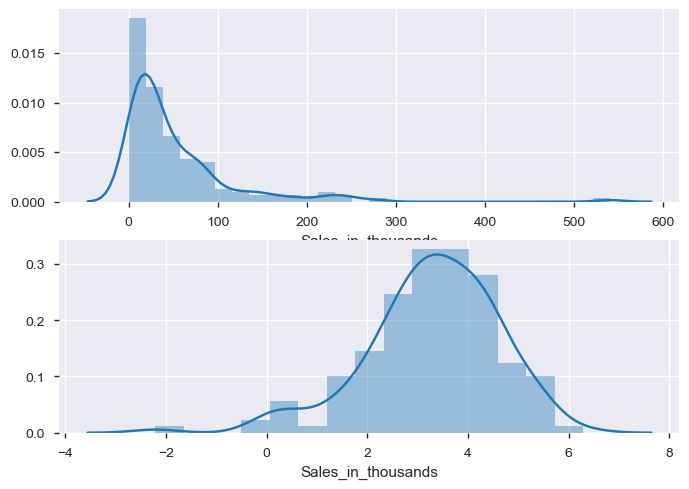

In [899]:
#S1 Check relation with Y. This shd be normally distributed. if not transform it

#sns.distplot(car_final["Sales_in_thousands"])
subplot(2,1,1)
sns.distplot(car_final["Sales_in_thousands"])
ln_SIT=np.log(car_final["Sales_in_thousands"]) # Log transformation of varaiable

subplot(2,1,2)
sns.distplot(ln_SIT)




In [900]:
#car_final["ln_Engine_size"]=np.log(car_final["Engine_size"])
#car_final["ln_Width"]=np.log(car_final["Width"])
#car_final["ln_Horsepower"]=np.sqrt(car_final["Horsepower"])

#subplot(3,2,1)
#sns.distplot(car_final["Engine_size"])
#subplot(3,2,2)
#sns.distplot(car_final["ln_Engine_size"])



#subplot(3,2,3)
#sns.distplot(car_final["Width"])
#subplot(3,2,4)
#sns.distplot(car_final["ln_Width"])


#subplot(3,2,5)
#sns.distplot(car_final["Horsepower"])
#subplot(3,2,6)
#sns.distplot(car_final["ln_Horsepower"])




In [901]:
#Select log of Y as Y 
car_final["ln_Sales_in_thousands"]=np.log(car_final["Sales_in_thousands"])
car_final.drop(['Sales_in_thousands'],axis=1, inplace=True)


In [902]:
car_final

,Manufacturer_Audi,Manufacturer_BMW,Manufacturer_Buick,Manufacturer_Cadillac,Manufacturer_Chevrolet,Manufacturer_Chrysler,Manufacturer_Dodge,Manufacturer_Ford,Manufacturer_Honda,Manufacturer_Hyundai,...,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,No_of_Days,ln_Sales_in_thousands
0,0,0,0,0,0,0,0,0,0,0,...,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,3077.460071,2.828437
1,0,0,0,0,0,0,0,0,0,0,...,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3321.460071,3.673360
2,0,0,0,0,0,0,0,0,0,0,...,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,3106.460071,2.647167
3,0,0,0,0,0,0,0,0,0,0,...,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3406.460071,2.150366
4,1,0,0,0,0,0,0,0,0,0,...,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3194.460071,3.015388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,0,0,0,0,0,0,0,0,0,0,...,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,3211.460071,1.265538
153,0,0,0,0,0,0,0,0,0,0,...,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,2781.460071,2.724252
154,0,0,0,0,0,0,0,0,0,0,...,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,3299.460071,2.863971
155,0,0,0,0,0,0,0,0,0,0,...,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,3359.460071,1.250761


In [903]:
#S2 check realtion of Y & X . This shd be linear 

corr_mat=car_final.corr()
corr_mat.to_csv('corr_mat.csv')

# Hide all col expect requi Y which is log of Y

In [904]:
#S3: Already done using correlation matrix
# We checkked the sheet again and found folowing variables in top 10 least value:
# Or values with CORRELATION <0.1

#
# 'Manufacturer_Infiniti' , 'Manufacturer_Lincoln' , 'Manufacturer_Chrysler', 
#'Fuel_capacity', 'Manufacturer_Mercury', 'Manufacturer_Volkswagen' , 'year',
#'Manufacturer_Subaru' ,'Manufacturer_Jaguar','Curb_weight, Width' ,
#'Manufacturer_Hyundai', 'Manufacturer_BMW', 'Manufacturer_Oldsmobile',
#'Manufacturer_Cadillac', 'Manufacturer_Saab','Manufacturer_Buick',
#'Manufacturer_Dodge','Manufacturer_Chevrolet','Manufacturer_Pontiac'




# Now these variables in its vanialla version dont have a strong linear relationship with Y
# Can they be converted/Transformation to have a linear relationship with Y


#car_final.drop(['Manufacturer_Infiniti' , 'Manufacturer_Lincoln' , 'Manufacturer_Chrysler',  'Fuel_capacity', 'Manufacturer_Mercury', 'Manufacturer_Volkswagen' ,'Manufacturer_Saturn', 'Manufacturer_Subaru' ,'Manufacturer_Jaguar','Curb_weight', 'Width' ,'Manufacturer_Hyundai', 'No_of_Days','Manufacturer_BMW', 'Manufacturer_Oldsmobile','Manufacturer_Cadillac', 'Manufacturer_Saab','Manufacturer_Buick','Manufacturer_Dodge','Manufacturer_Chevrolet','Manufacturer_Pontiac'],axis=1,inplace=True)
car_final.columns


Index(['Manufacturer_Audi', 'Manufacturer_BMW', 'Manufacturer_Buick',
       'Manufacturer_Cadillac', 'Manufacturer_Chevrolet',
       'Manufacturer_Chrysler', 'Manufacturer_Dodge', 'Manufacturer_Ford',
       'Manufacturer_Honda', 'Manufacturer_Hyundai', 'Manufacturer_Infiniti',
       'Manufacturer_Jaguar', 'Manufacturer_Jeep', 'Manufacturer_Lexus',
       'Manufacturer_Lincoln', 'Manufacturer_Mercedes-B',
       'Manufacturer_Mercury', 'Manufacturer_Mitsubishi',
       'Manufacturer_Nissan', 'Manufacturer_Oldsmobile',
       'Manufacturer_Plymouth', 'Manufacturer_Pontiac', 'Manufacturer_Porsche',
       'Manufacturer_Saab', 'Manufacturer_Saturn', 'Manufacturer_Subaru',
       'Manufacturer_Toyota', 'Manufacturer_Volkswagen', 'Manufacturer_Volvo',
       'Vehicle_type_Passenger', 'Price_in_thousands', 'Engine_size',
       'Horsepower', 'Wheelbase', 'Width', 'Length', 'Curb_weight',
       'Fuel_capacity', 'Fuel_efficiency', 'No_of_Days',
       'ln_Sales_in_thousands'],
      dtype=

In [905]:

#S4 Selctive Recursive feature selection: on dropping each variable again build model to check significance
# G1 Bivariate correlation in above step
# G2 check relation- (Univariate X & Y) or (F-regression)
# G3 RFE ----Reduce one by one ---> LR affected by multicollinearity 
#G4 or K Best--- Add one by one
#G5 VIF--- Before doing this find imp key variables from above step



#G1 VAL::::::::::::::::::
# 'Manufacturer_Infiniti' , Manufacturer_Lincoln , Manufacturer_Chrysler, Fuel_capacity, Manufacturer_Mercury
# Manufacturer_Volkswagen , year, Manufacturer_Subaru ,Manufacturer_Saturn ,Manufacturer_Jaguar
# Curb_weight, Width , Manufacturer_Hyundai

#G2 VAL:::::::::::::::
# Price_in_thousands,four_year_resale_value, Power_perf_factor, Horsepower
# Manufacturer_Ford,Wheelbase,Vehicle_type_Passenger,Manufacturer_Porsche
# Manufacturer_Mercedes-B, Length , Manufacturer_Mitsubishi ,Manufacturer_Honda
# Manufacturer_Volvo,Manufacturer_Toyota, Engine_size


#G3 VAL::::::::::::::::::
#'Curb_weight', 'Engine_size', 'Length', 'Manufacturer_Ford','Power_perf_factor', 
#'Price_in_thousands', 'Wheelbase', 'Width','four_year_resale_value', 'month'


car_final.columns=[i.replace('-','_') for i in car_final.columns]
(car_final.columns)



Index(['Manufacturer_Audi', 'Manufacturer_BMW', 'Manufacturer_Buick',
       'Manufacturer_Cadillac', 'Manufacturer_Chevrolet',
       'Manufacturer_Chrysler', 'Manufacturer_Dodge', 'Manufacturer_Ford',
       'Manufacturer_Honda', 'Manufacturer_Hyundai', 'Manufacturer_Infiniti',
       'Manufacturer_Jaguar', 'Manufacturer_Jeep', 'Manufacturer_Lexus',
       'Manufacturer_Lincoln', 'Manufacturer_Mercedes_B',
       'Manufacturer_Mercury', 'Manufacturer_Mitsubishi',
       'Manufacturer_Nissan', 'Manufacturer_Oldsmobile',
       'Manufacturer_Plymouth', 'Manufacturer_Pontiac', 'Manufacturer_Porsche',
       'Manufacturer_Saab', 'Manufacturer_Saturn', 'Manufacturer_Subaru',
       'Manufacturer_Toyota', 'Manufacturer_Volkswagen', 'Manufacturer_Volvo',
       'Vehicle_type_Passenger', 'Price_in_thousands', 'Engine_size',
       'Horsepower', 'Wheelbase', 'Width', 'Length', 'Curb_weight',
       'Fuel_capacity', 'Fuel_efficiency', 'No_of_Days',
       'ln_Sales_in_thousands'],
      dtype=

In [906]:
#Recursive Feature Elimination----To find best variable

#Define Features---- Everything except for dependant varaibles; Ie. all independant variable
# Define Target---The dependant ie. to be rpedicted variable

features= car_final[car_final.columns.difference(['ln_Sales_in_thousands'])]
target=car_final['ln_Sales_in_thousands']


In [907]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import itertools


#lm=LinearRegression()  # Can use random forest etc other techniques
                        # LInear Regression will get affceted by multicollinearity
    # We could observe these as all the Manufactures name came up in this list
    
lm= RandomForestRegressor()

#Create RFE model and select 10 attributes
rfe = RFE(lm,n_features_to_select=10)
#rfe.fit(car_final[car_final.columns.difference(['ln_Sales_in_thousands'])], target)
rfe.fit(features, target)


RFE(estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                    criterion='mse', max_depth=None,
                                    max_features='auto', max_leaf_nodes=None,
                                    max_samples=None, min_impurity_decrease=0.0,
                                    min_impurity_split=None, min_samples_leaf=1,
                                    min_samples_split=2,
                                    min_weight_fraction_leaf=0.0,
                                    n_estimators=100, n_jobs=None,
                                    oob_score=False, random_state=None,
                                    verbose=0, warm_start=False),
    n_features_to_select=10, step=1, verbose=0)

In [908]:
features.columns[rfe.support_]

Index(['Curb_weight', 'Engine_size', 'Fuel_capacity', 'Horsepower', 'Length',
       'Manufacturer_Ford', 'No_of_Days', 'Price_in_thousands', 'Wheelbase',
       'Width'],
      dtype='object')

In [909]:
### Select K best for finidng imp variables
# Not done for now

In [910]:
# G2 check relation- (Univariate X & Y) or (F-regression)
#uNIVARIATE-> 1 X , 1y build model, metrics to look for is f-regression
# Feature selection based on importance


from sklearn.feature_selection import f_regression
f_values,p_values=f_regression(features,target)

In [911]:
import itertools # get output in one place
f_reg_results=[(i,v,z) for i,v,z in itertools.zip_longest(features.columns, f_values, ['%.3f' %p for p in p_values])]
f_reg_results=pd.DataFrame((f_reg_results),columns=['variable','f_values','p_values'])
f_reg_results.sort_values(by=['f_values'],ascending=False, inplace=True)
f_reg_results.to_csv('f_reg_results.csv')

PermissionError: [Errno 13] Permission denied: 'f_reg_results.csv'

In [ ]:
# G3 RFE ----Reduce one by one ---> LR affected by multicollinearity 
# Using linear regression and Random forest

features=car_final[car_final.columns.difference(['ln_Sales_in_thousands','Sales_in_thousands'])]
target=car_final['ln_Sales_in_thousands']


In [912]:
#car_final.info()

In [913]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import itertools

lm=LinearRegression() # --> Leads to error if multicollinearity ehic exist hoursepower<-> Power per fac; resale 4 yrs<-> price
#lm=RandomForestRegressor()

# Create a RFE Model and select 10 attributes
rfe=RFE(lm, n_features_to_select=10)
rfe=rfe.fit(features,target)


In [914]:
features.columns[rfe.support_]

Index(['Manufacturer_Buick', 'Manufacturer_Chevrolet', 'Manufacturer_Ford',
       'Manufacturer_Honda', 'Manufacturer_Hyundai', 'Manufacturer_Jeep',
       'Manufacturer_Nissan', 'Manufacturer_Pontiac', 'Manufacturer_Porsche',
       'Manufacturer_Toyota'],
      dtype='object')

In [915]:
x=car_final.columns
x

#x.drop(['ln_Sales_in_thousands'], axis=1,inplace=True)


Index(['Manufacturer_Audi', 'Manufacturer_BMW', 'Manufacturer_Buick',
       'Manufacturer_Cadillac', 'Manufacturer_Chevrolet',
       'Manufacturer_Chrysler', 'Manufacturer_Dodge', 'Manufacturer_Ford',
       'Manufacturer_Honda', 'Manufacturer_Hyundai', 'Manufacturer_Infiniti',
       'Manufacturer_Jaguar', 'Manufacturer_Jeep', 'Manufacturer_Lexus',
       'Manufacturer_Lincoln', 'Manufacturer_Mercedes_B',
       'Manufacturer_Mercury', 'Manufacturer_Mitsubishi',
       'Manufacturer_Nissan', 'Manufacturer_Oldsmobile',
       'Manufacturer_Plymouth', 'Manufacturer_Pontiac', 'Manufacturer_Porsche',
       'Manufacturer_Saab', 'Manufacturer_Saturn', 'Manufacturer_Subaru',
       'Manufacturer_Toyota', 'Manufacturer_Volkswagen', 'Manufacturer_Volvo',
       'Vehicle_type_Passenger', 'Price_in_thousands', 'Engine_size',
       'Horsepower', 'Wheelbase', 'Width', 'Length', 'Curb_weight',
       'Fuel_capacity', 'Fuel_efficiency', 'No_of_Days',
       'ln_Sales_in_thousands'],
      dtype=

In [916]:
#Variables not consideed:
 #'Manufacturer_BMW', 'Manufacturer_Buick',
      # 'Manufacturer_Cadillac', 'Manufacturer_Chevrolet',
       #'Manufacturer_Chrysler', 'Manufacturer_Dodge',
       #'Manufacturer_Hyundai', 'Manufacturer_Infiniti',
       #'Manufacturer_Jaguar',
     #'Manufacturer_Lincoln',        'Manufacturer_Mercury',
          #'Manufacturer_Oldsmobile',
              #'Manufacturer_Pontiac', 'Manufacturer_Porsche',
       #'Manufacturer_Saab', 'Manufacturer_Saturn', 'Manufacturer_Subaru',   'Manufacturer_Volkswagen',
      

final_list_var=[
         'Manufacturer_Audi', 
       'Manufacturer_Jeep', 'Manufacturer_Lexus',
          'Manufacturer_Nissan', 
         'Manufacturer_Plymouth', 
       'Manufacturer_Volvo','Manufacturer_Toyota',
    'Manufacturer_Honda','Manufacturer_Mercedes_B',
      'Manufacturer_Ford',  'Manufacturer_Mitsubishi',
      'Vehicle_type_Passenger',
    'Price_in_thousands',
   # 'Engine_size',#'Length',     'Horsepower', 'Wheelbase', 
    #'Width',    'Curb_weight', #'Fuel_capacity',    'Fuel_efficiency', 'No_of_Days',
    #'Sales_in_thousands'
]


In [917]:
#G5 VIF Variance Inflation Factor --- Before doing this find imp key variables from above step
from statsmodels.stats.outliers_influence import variance_inflation_factor
x=features[final_list_var]
y=target

vif=pd.DataFrame()
vif["vif_factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif["feature"]=x.columns
x=vif.round(1).sort_values(by=["vif_factor"],ascending=False)
x

,vif_factor,feature
12,3.6,Price_in_thousands
11,2.7,Vehicle_type_Passenger
8,1.3,Manufacturer_Mercedes_B
2,1.2,Manufacturer_Lexus
0,1.1,Manufacturer_Audi
5,1.1,Manufacturer_Volvo
6,1.1,Manufacturer_Toyota
9,1.1,Manufacturer_Ford
10,1.1,Manufacturer_Mitsubishi
1,1.0,Manufacturer_Jeep


In [961]:
final_list_var=[
    # 'Manufacturer_Nissan','Manufacturer_Lexus','Manufacturer_Jeep',
    # 'Manufacturer_Audi','Manufacturer_Plymouth','Manufacturer_Toyota','Manufacturer_Volvo',
   # 'Manufacturer_Honda',
    'Manufacturer_Mitsubishi','Manufacturer_Mercedes_B',
    'Manufacturer_Porsche',
    
    'Manufacturer_Ford',
    #'Vehicle_type_Passenger', 'Price_in_thousands',
    
    #'Engine_size','Length','Horsepower',
   # 'Wheelbase', #'Width',    'Curb_weight', 
    #'Fuel_capacity',    'Fuel_efficiency', 'No_of_Days'
    
]

In [1132]:
final_list_var=[
    # 'Manufacturer_Nissan','Manufacturer_Lexus','Manufacturer_Jeep',
    # 'Manufacturer_Audi','Manufacturer_Plymouth','Manufacturer_Toyota','Manufacturer_Volvo',
   # 'Manufacturer_Honda',
    'Manufacturer_Mitsubishi',#'Manufacturer_Mercedes_B',
        'Manufacturer_Ford',
    'Vehicle_type_Passenger',
    'Price_in_thousands',
    
    #'Engine_size','Length',    'Horsepower',
   # 'Wheelbase', 'Width',     'Curb_weight', 
    #'Fuel_capacity',     'Fuel_efficiency',      'No_of_Days'
    
]

In [1133]:
lm_car_variables=final_list_var
final=pd.DataFrame(car_final[lm_car_variables])
final["ln_Sales_in_thousands"]=car_final["ln_Sales_in_thousands"]

In [1134]:
## Recursive dropping based on Pvlaue of variable in Linear regression output


In [1135]:
#final.head(10)

In [1136]:
train, test= train_test_split(final,test_size=0.3,random_state=101) # Test data will be 30% 
train.shape

(109, 5)

In [1137]:
eqn="ln_Sales_in_thousands~"+"+".join(lm_car_variables)
print(eqn)

ln_Sales_in_thousands~Manufacturer_Mitsubishi+Manufacturer_Ford+Vehicle_type_Passenger+Price_in_thousands


In [1138]:
#eqn="ln_Sales_in_thousands~"+"+".join(x.feature)

#eqn="ln_Sales_in_thousands~Price_in_thousands+Vehicle_type_Passenger+Manufacturer_Mercedes_B+Manufacturer_Ford+Manufacturer_Porsche+Manufacturer_Volvo+Manufacturer_Mitsubishi+Manufacturer_Honda+Manufacturer_Toyota"
# drop Manufacturer_Porsche  

#eqn="ln_Sales_in_thousands~Price_in_thousands+Vehicle_type_Passenger+Manufacturer_Mercedes_B+Manufacturer_Ford+Manufacturer_Volvo+Manufacturer_Mitsubishi+Manufacturer_Honda+Manufacturer_Toyota"
# drop Manufacturer_Mercedes_B  p-> 0.293

#eqn="ln_Sales_in_thousands~Price_in_thousands+Vehicle_type_Passenger+Manufacturer_Mercedes_B+Manufacturer_Ford+Manufacturer_Volvo+Manufacturer_Mitsubishi+Manufacturer_Toyota"
# drop Manufacturer_Honda  p-> 0.203

#eqn="ln_Sales_in_thousands~Price_in_thousands+Vehicle_type_Passenger+Manufacturer_Ford+Manufacturer_Volvo+Manufacturer_Mitsubishi+Manufacturer_Toyota"
# drop toyoto

       
#eqn="ln_Sales_in_thousands~Price_in_thousands+Vehicle_type_Passenger+Manufacturer_Ford+Manufacturer_Volvo+Manufacturer_Mitsubishi"

print(eqn)

ln_Sales_in_thousands~Manufacturer_Mitsubishi+Manufacturer_Ford+Vehicle_type_Passenger+Price_in_thousands


In [1139]:
ols_model=smp.ols(formula=eqn,data=train)
ols_model_output=ols_model.fit()


In [1140]:

print(ols_model_output.summary())

                              OLS Regression Results                             
Dep. Variable:     ln_Sales_in_thousands   R-squared:                       0.449
Model:                               OLS   Adj. R-squared:                  0.428
Method:                    Least Squares   F-statistic:                     21.22
Date:                   Mon, 06 Jul 2020   Prob (F-statistic):           8.16e-13
Time:                           11:33:00   Log-Likelihood:                -159.74
No. Observations:                    109   AIC:                             329.5
Df Residuals:                        104   BIC:                             342.9
Df Model:                              4                                         
Covariance Type:               nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

In [1141]:
#mathematical equation
#log(sales_in thousand)=5.0982 +(-0.0497  *Price_in_thousands)+(-0.5571*Vehicle_type_Passenger) + (1.4735*Manufacturer_Ford) + (-1.2121*  Manufacturer_Volvo) +(-1.8190 * Manufacturer_Mitsubishi )
###WRONG; INtercept not SIGNIFICANT log(sales_in thousand)=0.3296+(-0.0548*Price_in_thousands) +(1.2182*Manufacturer_Ford)+(-0.5251*Vehicle_type_Passenger)+(0.0259*length) +(-1.7383*Manufacturer_Mitsubishi  )
#log(Sales_in_thousands)= 4.6476+ (-0.0507*Price_in_thousands) +  (1.6287 *Manufacturer_Ford)+ (-1.9061*Manufacturer_Mitsubishi)   

In [1142]:
train_predicted=np.exp(ols_model_output.predict(train))
test_predicted=np.exp(ols_model_output.predict(test))

In [1143]:
#metrics
train_actual=np.exp(train.ln_Sales_in_thousands)
test_actual=np.exp(test.ln_Sales_in_thousands)

In [1144]:
#RMSE Root Mean Square Error
train_RMSE= np.sqrt(np.mean(np.square(train_actual-train_predicted)))
test_RMSE= np.sqrt(np.mean(np.square(test_actual-test_predicted)))
print(train_RMSE)
print(test_RMSE)

62.2616716485831
44.19247591340183


In [1145]:
#MAPE Mean Absolute Percentage Error
train_MAPE= np.mean(np.abs((train_actual-train_predicted)/train_actual))
test_MAPE= np.mean(np.abs((test_actual-test_predicted)/test_actual))
print(train_MAPE)
print(test_MAPE)

1.6037820429520524
0.7637212214903961


In [1146]:
#RMSPE Root Mean Square Percentage Error
train_RMSE= np.sqrt(np.mean(np.square(train_actual-train_predicted/train_actual)))
test_RMSE= np.sqrt(np.mean(np.square(test_actual-test_predicted/test_actual)))
print(train_RMSE)
print(test_RMSE)

93.80249192556109
63.541205802568555


In [1147]:
#Correlation cofficient
train_Corrcoef=np.corrcoef(train_actual, train_predicted)
test_Corrcoef=np.corrcoef(test_actual, test_predicted)
print(train_Corrcoef)
print(test_Corrcoef)

[[1.         0.61418619]
 [0.61418619 1.        ]]
[[1.         0.79945425]
 [0.79945425 1.        ]]


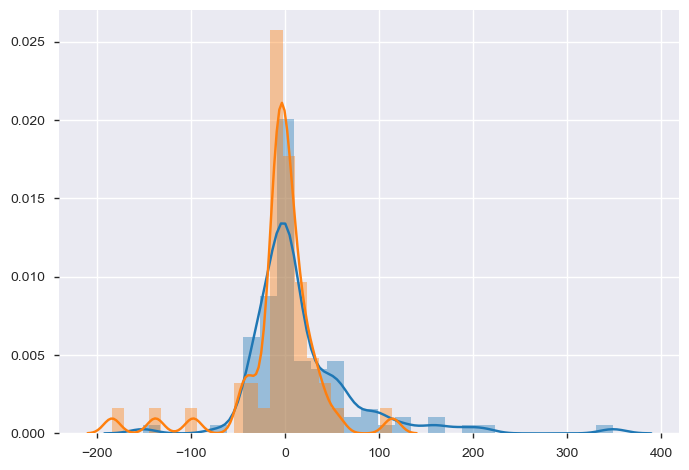

In [1148]:
# Check
#1. Errors have normal distribution
#2. Errors do not have relationship with Y--- Ideally between 10% ; Linenet can be 20%; If more than that them improv emodel

train_errors=train_actual-train_predicted
test_errors=test_actual-test_predicted
sns.distplot(train_errors)
sns.distplot(test_errors)

In [1149]:
Y_error_corrcoef=np.corrcoef(train_actual, train_errors)
print(Y_error_corrcoef)

[[1.         0.87151318]
 [0.87151318 1.        ]]


In [1150]:
#Decile analysis

train_results= pd.concat([train_actual,train_predicted],axis=1)
test_results= pd.concat([test_actual,test_predicted],axis=1)
train_results.columns=['actual','predicted']
test_results.columns=['actual','predicted']

In [1151]:
train_results['Deciles']=pd.qcut(train_results['predicted'],10,labels=False)
train_results.groupby(['Deciles']).apply(mean)

,actual,predicted,Deciles
Deciles,,,
0,11.857909,4.324973,0.0
1,17.857455,10.676542,1.0
2,18.657091,17.112521,2.0
3,38.814182,25.967464,3.0
4,53.880545,30.719875,4.0
5,48.886000,34.855601,5.0
6,82.763909,39.518593,6.0
7,71.288273,45.026524,7.0
8,74.535455,55.166589,8.0


In [1152]:
# Given that actual and error are correlated implies Underfitting
#Therefore, we now need to handle overfitting
# why overfittin
    #1. Lot of variables, trasnformation
        #REgularization
        #CRoss validation (K-Fold Validation)
    #2. SE high for coeficients; Because of sample is low, no of obervations are low
    #3. Data has multicollinearity
    #4.LR assumptions are not followed
    #5. Data not prepapred well
    
 # How to handle UNDERFITTING
    #1. Include more variables
    #2. Follow assumptions of linearity (X& Y shoul have linear relationship)
    #3. Data has multicollinearity
    #4.L R assumptions are not followed
    #5. Data not prepapred well
    #6. Not using right technique
    #7. If you did not use rigtht tuning parameters (Machine Learning)


In [1153]:
from sklearn.externals import joblib
joblib.dump(ols_model_output,'ols_model')

['ols_model']

In [1154]:
###Lets save everything in metrics_df to pickle object

import pickle

#now you can save it to  a file
with open('ols_model','wb') as f:
    pickle.dump(model,f)
    
# and later you can load it
with open('model.pkl','rb') as f:
    model=pickle.load(f)

NameError: name 'model' is not defined